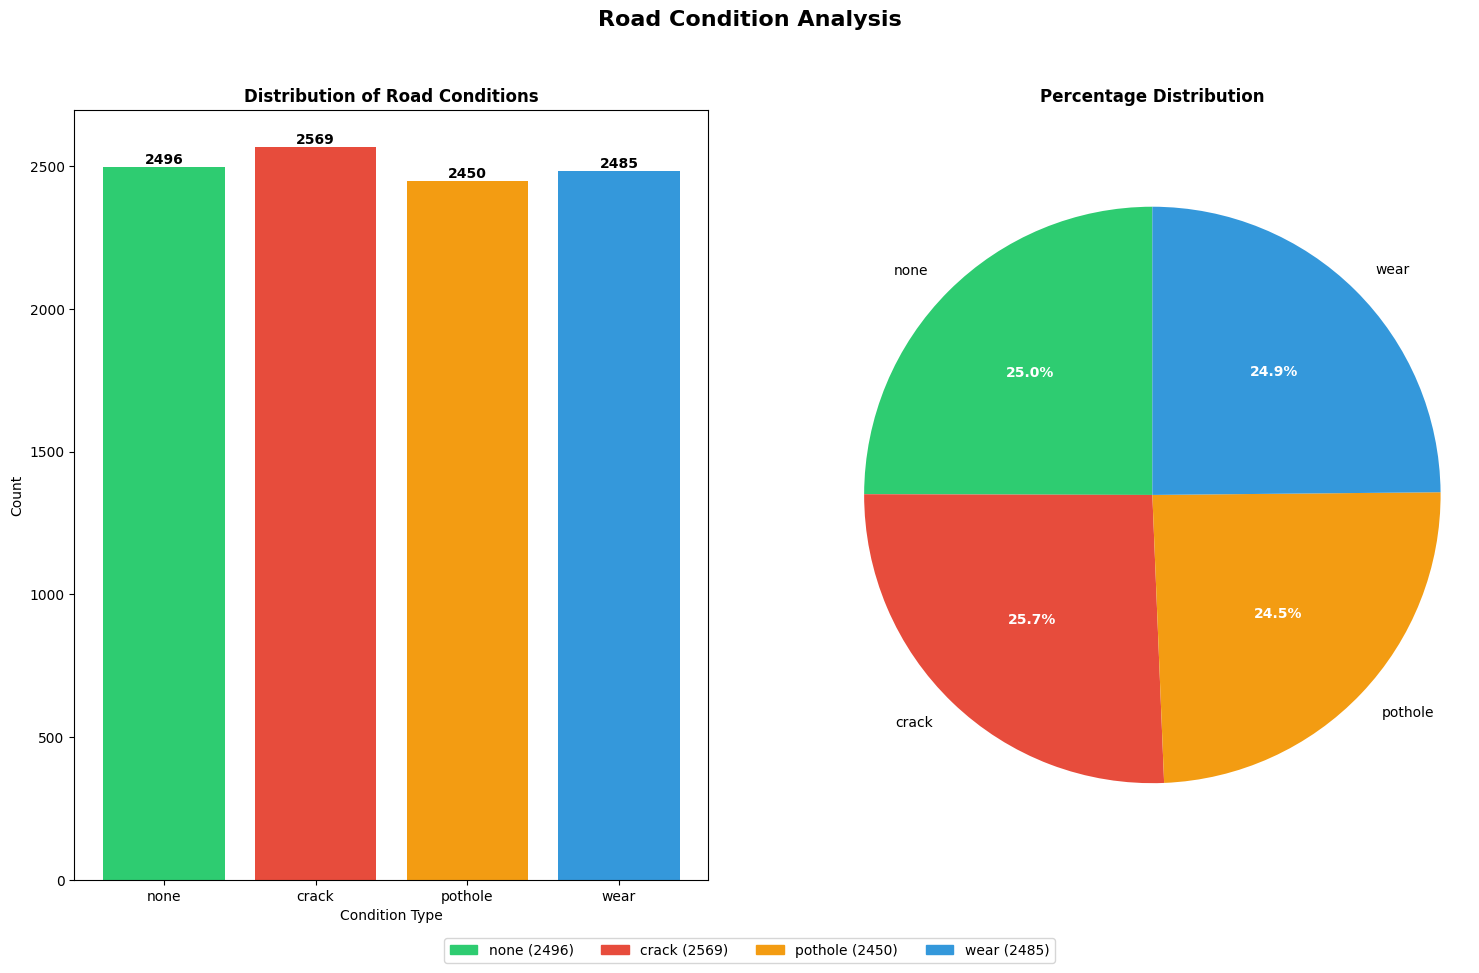

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import RadioButtons, Button
import matplotlib.patches as mpatches

file_path = r'D:\DEPI PROJECT PAVEMENT EYE\sample.geojson'

with open(file_path, 'r', encoding="utf-8") as f: 
    geojson_data = json.load(f)

label_counts = {}
for feature in geojson_data['features']:
    label = feature['properties']['label']
    label_counts[label] = label_counts.get(label, 0) + 1

labels = list(label_counts.keys())
counts = list(label_counts.values())

colors = {
    'none': '#2ecc71',      
    'crack': '#e74c3c',     
    'pothole': '#f39c12',   
    'wear': '#3498db'       
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Road Condition Analysis', fontsize=16, fontweight='bold')

#Bar chart
bars = ax1.bar(labels, counts, color=[colors[label] for label in labels])
ax1.set_title('Distribution of Road Conditions', fontweight='bold')
ax1.set_xlabel('Condition Type')
ax1.set_ylabel('Count')

for bar, count in zip(bars, counts):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             str(count), ha='center', va='bottom', fontweight='bold')

#pie chart
wedges, texts, autotexts = ax2.pie(counts, labels=labels, autopct='%1.1f%%',
                                   colors=[colors[label] for label in labels],
                                   startangle=90)
ax2.set_title('Percentage Distribution', fontweight='bold')
ax2.axis('equal')  

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')


legend_patches = [mpatches.Patch(color=colors[label], label=f'{label} ({count})') 
                  for label, count in zip(labels, counts)]
fig.legend(handles=legend_patches, loc='lower center', ncol=len(labels), 
           bbox_to_anchor=(0.5, 0.02), fontsize=10)

plt.show()